<a href="https://colab.research.google.com/github/joaovictordds/joaovictordds/blob/main/previsao_preco_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install autots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from seaborn import regression
sns.set()
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Select the ticker:
acao = 'BBDC4.SA'
# This code will collect data:
previsao = yf.download(acao, start='2023-01-01')
previsao['Data'] = previsao.index
previsao.dropna()
previsao.tail(10)

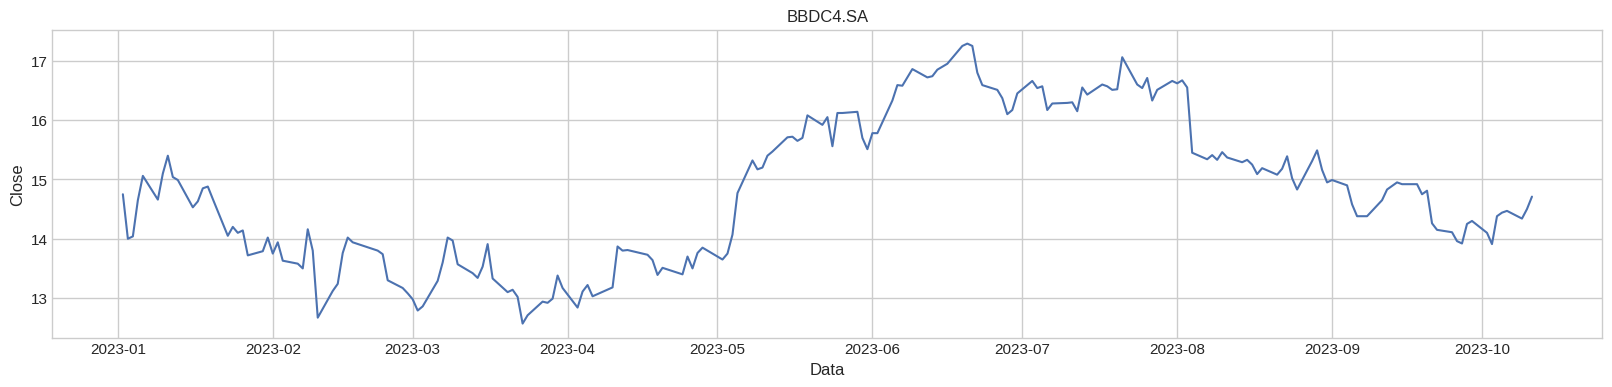

In [8]:
# Plotando o gráfico desde o início de 2020
plt.figure(figsize=(20, 4))
plt.title(acao)
plt.xlabel("Data")
plt.ylabel("Close")
plt.plot(previsao["Close"])
plt.show();

In [ ]:
## Modeling the data and forecasting prices:
# The code lines in the block below will select the necessary columns, clean more than +200 past dates, forecast prices for the next 10 days,
# and make this information available in a dataset for plotting a new graph. This code took 4 minutes to run on my machine:

from autots import AutoTS # lib of the algorítmo
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(previsao, date_col='Data', value_col='Close', id_col=None)

# Modelo de Regressão Logística:
prediction = model.predict()
forecast = prediction.forecast

In [10]:
# After execution, the code below will display the result generated in the form of a table of the last three days and process the date column for plotting the graph:

forecast['Data'] = forecast.index
forecast.tail(3) # you can put the 10 days if you want to see in a table

,Close,Data
2023-10-23,14.196828,2023-10-23
2023-10-24,14.186115,2023-10-24
2023-10-25,14.243395,2023-10-25


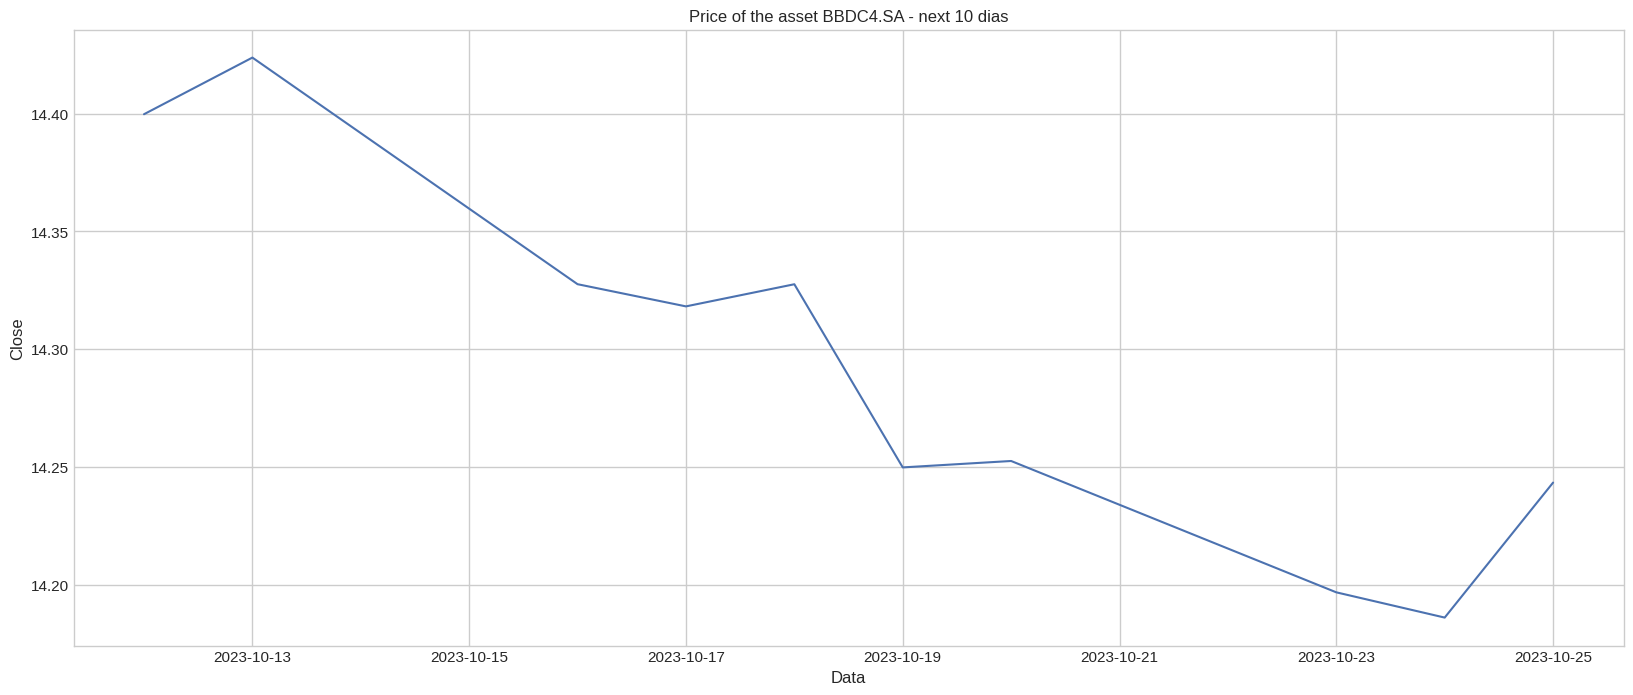

In [11]:
# Now, the chart of the forecasts:

# Chart of the next 10 days:
plt.figure(figsize=(20, 8))
plt.title(f"Price of the asset {acao} - next 10 dias")
plt.xlabel("Data")
plt.ylabel("Close")
plt.plot(forecast["Close"])
plt.show();